# Figure 2 \& 22

In [1]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils.plots import energy_plot, six_panel_plot, quick_plot 
from wind_ae.wrapper.wrapper_utils import constants as const
from wind_ae.wrapper.wrapper_utils.system import system
from wind_ae.wrapper.wrapper_utils.spectrum import spectrum
import wind_ae.McAstro.atoms.atomic_species as McAtom

import matplotlib.pyplot as plt
import numpy as np


RHOSCALE (convergence condition) has changed from 10000 to 100. Remaking C code...                                                                                                    

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01



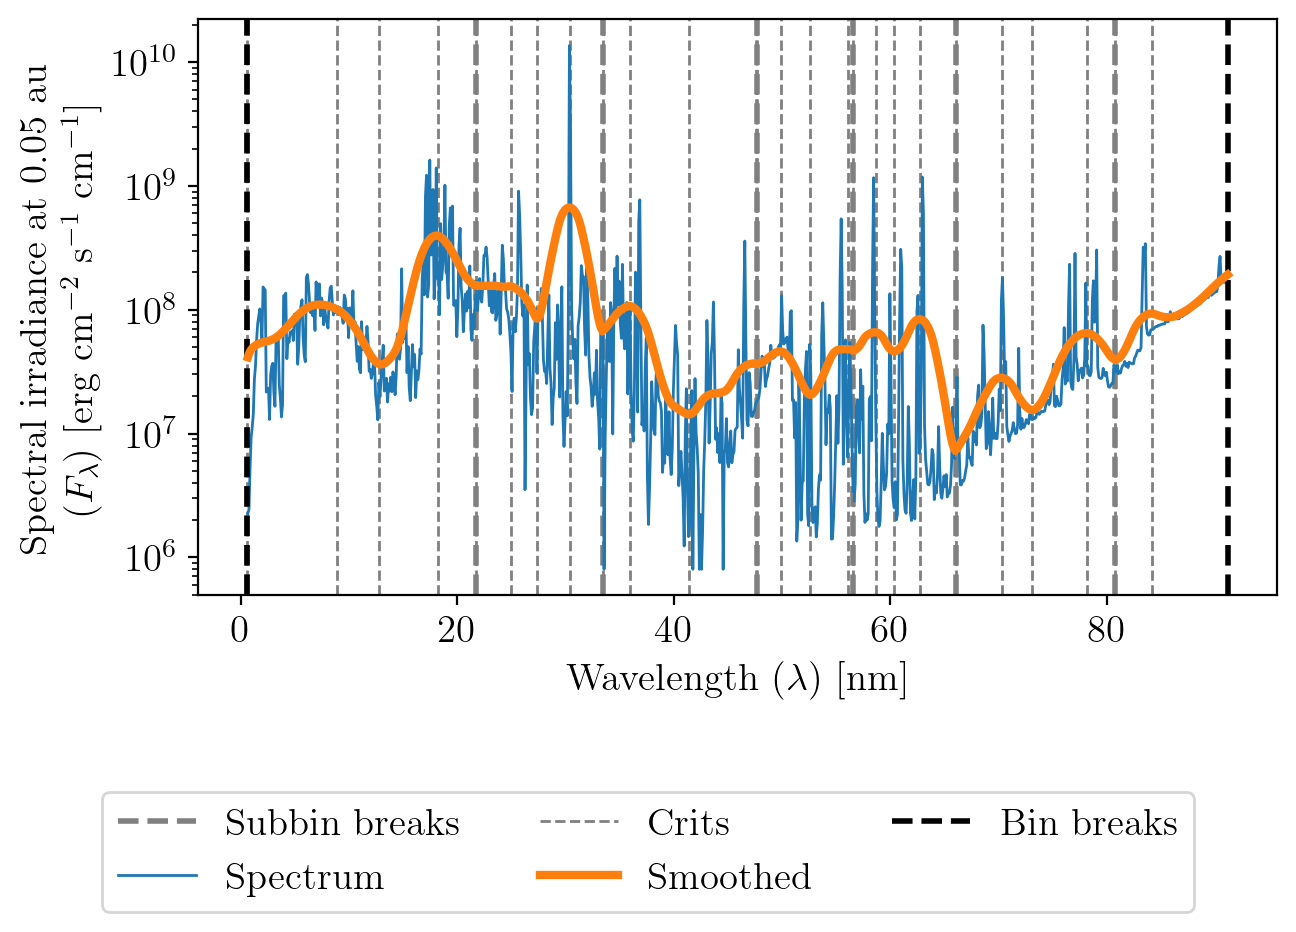

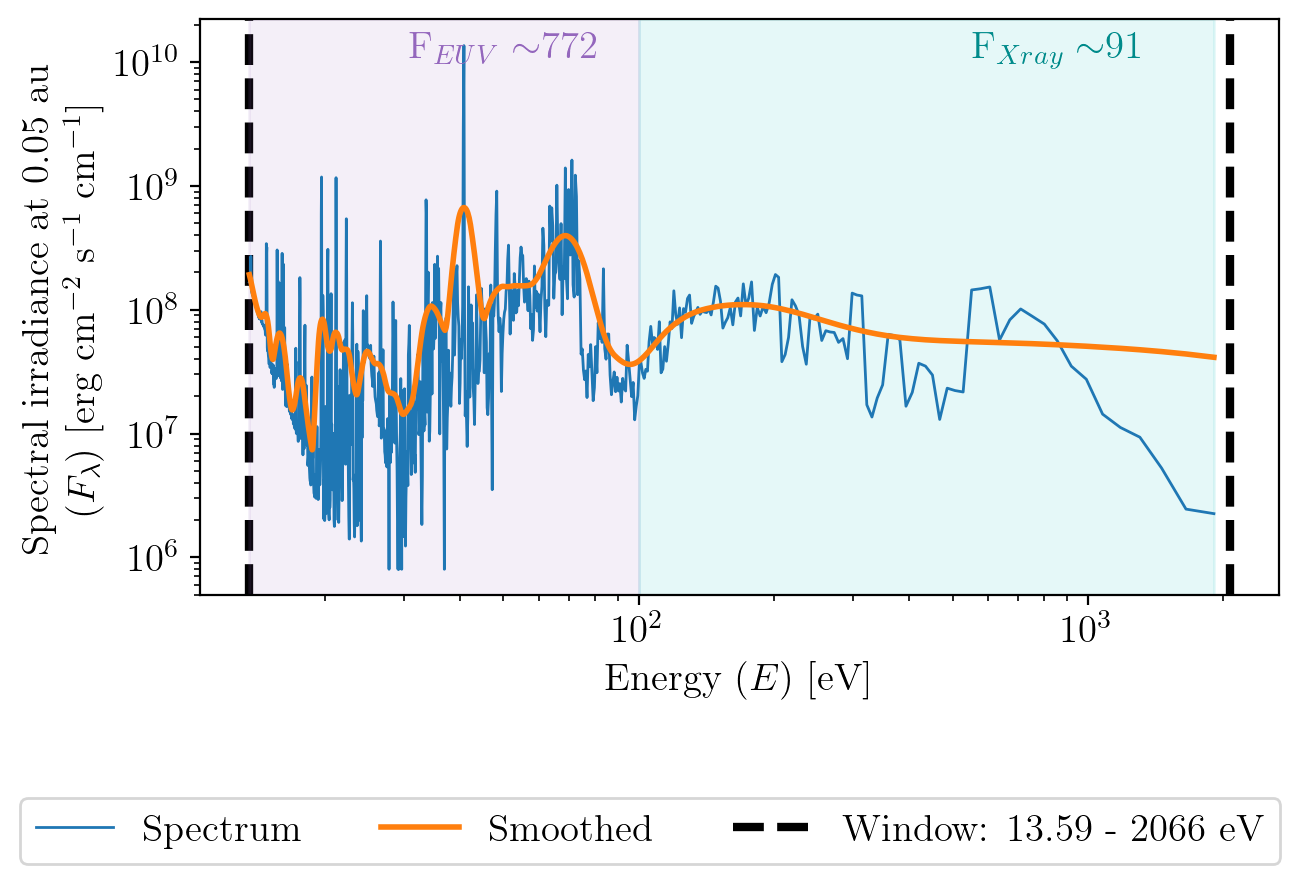

In [3]:
plt.rcParams.update({'font.size': 14})

sim = wind_sim()
sim.load_planet('data/HD209_13.6-2000eV_H-He.csv') 
#re-loading to update spectrum range for plotting purposes
sim.load_spectrum()
sim.spectrum.binning_plot(xaxis='wl',semimajor_au=sim.windsoln.semimajor/const.au)
plt.title('')
plt.show()

sim.spectrum.plot(xaxis='energy',
                  semimajor_au=sim.windsoln.semimajor/const.au,
                  highlight_euv=True)
plt.title('')
plt.show()

In [5]:
sim1 = wind_sim()
sim = wind_sim()
sim.load_planet('data/HD209_13.6-2000eV_hires.csv')
sim1.load_uservars('data/HD209_13.6-2000eV_H-He.csv')

         Wind-AE does not currently model conductive cooling. 
         Plot energy_plot(all_terms=True) to check.
Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01



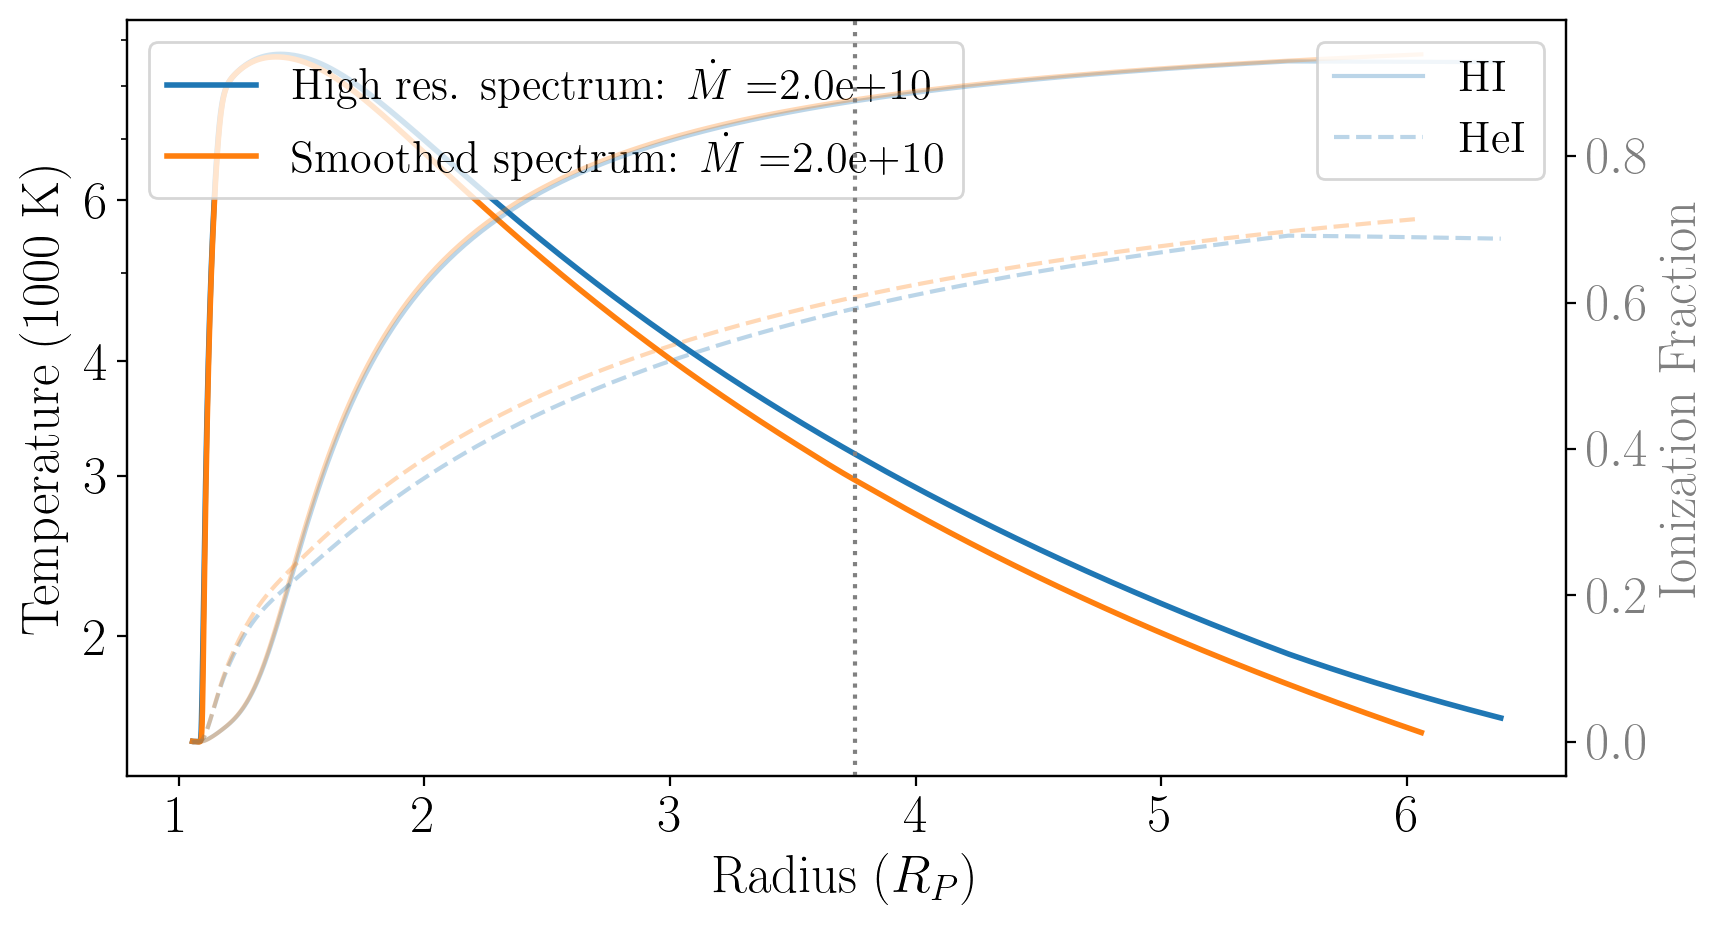

In [6]:
# Set default font size for plots
plt.rcParams.update({'font.size': 19})

# Example: Two lines with same x-axis but different y-axes
fig, ax1 = plt.subplots(figsize=(9, 5))

# First line on left y-axis
r = sim.windsoln.soln_norm['r']
r1 = sim1.windsoln.soln_norm['r']
y1 = sim.windsoln.soln['T']
color1 = 'tab:blue'
color2 = 'tab:orange'
ax1.set_xlabel('Radius ($R_P$)')
ax1.set_ylabel('Temperature (1000 K)', color='k',alpha=1)
ax1.plot(r, sim.windsoln.soln['T']/1000, lw=2,color=color1, label=r'High res. spectrum: $\dot{M}=$%.1e' %sim.windsoln.Mdot)
ax1.plot(r1, sim1.windsoln.soln['T']/1000, lw=2,color=color2, label=r'Smoothed spectrum: $\dot{M}=$%.1e' %sim1.windsoln.Mdot)
ax1.set_yscale('log')
ax1.set_yticks([2,3,4,6],['2','3','4','6'],)
ax1.tick_params(axis='y', labelcolor='k')

# Create second y-axis sharing the same x-axis
alpha = 0.3
ax2 = ax1.twinx()
ax2.set_ylabel('Ionization Fraction', color='tab:grey')
ax2.plot(r, 1-sim.windsoln.soln['Ys_HI'], color=color1, alpha=alpha,label='HI')
ax2.plot(r1, 1-sim1.windsoln.soln['Ys_HI'], color=color2, alpha=alpha)
ax2.plot(r, 1-sim.windsoln.soln['Ys_HeI'], color=color1, alpha=alpha,label='HeI',ls='--')
ax2.plot(r1, 1-sim1.windsoln.soln['Ys_HeI'], color=color2, alpha=alpha,ls='--')
ax2.tick_params(axis='y', labelcolor='tab:grey')

# Optional: Add legends
ax1.legend(loc='upper left', fontsize=16)
ax2.legend(loc='upper right', fontsize=16)
plt.axvline(sim.windsoln.R_sp, color='grey', ls=':', label='Sonic Point')

# Set x-axis to use scalar notation instead of scientific notation
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()